In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from collections import Counter
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.random.seed(42)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('../data/household_national.csv')

In [3]:
# columns to keep from df, removing weighted columns, etc.
mini_col_list = ['CONTROL', 'TOTROOMS', 'PERPOVLVL', 'COMTYPE', 'COMCOST','DBEVICLK', 'DBEVICNOTE', 'DBEVICTHT', 'DBFORCWHR', 'DBLVEFORC', 'RENT', 'BATHEXCLU', 'DISHWASH', 'SOLAR', 'GARAGE', 'DINING', 'LAUNDY', 'STORIES', 'NOSTEP', 'GUTREHB', 'CONDO', 'SEARCHFAM', 'SEARCHLIST', 'SEARCHNET', 'SEARCHOTH', 'SEARCHPUB', 'SEARCHREA', 'SEARCHSIGN', 'RMCHANGE', 'RMCOMMUTE', 'RMCOSTS', 'RMFAMILY', 'RMHOME', 'RMHOOD', 'RMJOB', 'RMOWNHH', 'RMOTHER', 'HMRACCESS', 'HMRENEFF', 'HMRSALE', 'BIKE', 'WALK', 'TRANAMT', 'COMDAYS', 'DIST', 'POOLAMT', 'RATINGHS', 'RATINGNH', 'NHQPCRIME', 'NHQPUBTRN', 'NHQRISK', 'NHQSCHOOL', 'NHQSCRIME', 'NORC', 'SUBDIV', 'NOWIRE', 'TENURE', 'MHWIDE', 'PLUGS', 'CELLPHONE', 'PORCH', 'LEAKO', 'LEAKI', 'NOTOIL', 'PAINTPEEL', 'HOWBUY', 'OCCJANUR', 'OCCFEBRU', 'OCCMARCH', 'OCCAPRIL', 'OCCMAY', 'OCCJUNE', 'OCCJULY', 'OCCAUGUST', 'OCCSEPTEM', 'OCCOCTOB', 'OCCNOVEM', 'OCCDECEM', 'OCCYRRND', 'LEADINSP', 'MONLSTOCC', 'SUITYRRND', 'TIMESHARE', 'VACRESDAYS', 'VACRNTDAYS', 'PERMNEAR', 'VACPRIRES', 'VACREC', 'VACINVEST', 'VACSELL', 'VACINHER', 'VACOTH', 'OWNLOT', 'RENTCNTRL', 'RENTSUB', 'NEARABAND', 'NEARBARCL', 'NEARTRASH', 'BUS', 'SUBWAY', 'VAN', 'DBMISSMORT', 'DBMISSRENT', 'DBUTBILL', 'DBEVICWHERE', 'INTLANG', 'DIVISION', 'OMB13CBSA', 'WEIGHT', 'SP1WEIGHT', 'SP2WEIGHT', 'INTMODE', 'INTSTATUS', 'INTMONTH', 'BLD', 'ENTRYSYS', 'HHSEX', 'HHMAR', 'HHSPAN', 'HHCITSHP', 'MILHH', 'HHAGE', 'HHMOVE', 'HHINUSYR', 'HHRACE', 'HHRACEAS', 'HHRACEPI', 'HHGRAD', 'HHNATVTY', 'HHENROLL', 'PARTNER', 'HSHLDTYPE', 'SAMEHHLD', 'NUMELDERS', 'NUMADULTS', 'NUMNONREL', 'HHYNGKIDS', 'HHOLDKIDS', 'NUMVETS', 'NUMYNGKIDS', 'NUMOLDKIDS', 'NUMSUBFAM', 'NUMSECFAM', 'NUMPEOPLE', 'HHADLTKIDS', 'GRANDHH', 'MULTIGEN', 'UFINROOMS', 'MHANCHOR', 'LOTSIZE', 'FINROOMS', 'YRBUILT', 'HOA', 'FOUNDTYPE', 'UNITFLOORS', 'UNITSIZE', 'BEDROOMS', 'KITCHENS', 'MONOXIDE', 'WATSOURCE', 'SEWUSERS', 'KITEXCLU', 'FRIDGE', 'KITCHSINK', 'WASHER', 'COOKTYPE', 'COOKFUEL', 'DRYER', 'SEWTYPE', 'BATHROOMS', 'HOTWATER', 'HEATFUEL', 'FIREPLACE', 'ACPRIMARY', 'ACSECNDRY', 'HEATTYPE', 'SUPP1HEAT', 'SUPP2HEAT', 'COLD', 'COLDEQ', 'NOWAT', 'COLDUTIL', 'COLDHTCAP', 'COLDINSUL', 'COLDCOST', 'COLDOTHER', 'LEAKOROOF', 'LEAKOBASE', 'LEAKOWALL', 'LEAKOOTH', 'LEAKIPLUM', 'LEAKIPIPE', 'LEAKIWATH', 'LEAKIOTH', 'LEAKIDK', 'WALLCRACK', 'FLOORHOLE', 'FNDCRUMB', 'ROOFSHIN', 'ROOFHOLE', 'ROOFSAG', 'WALLSIDE', 'WALLSLOPE', 'WINBOARD', 'WINBROKE', 'WINBARS', 'COLDEQFREQ', 'NOWATFREQ', 'NOTOILFREQ', 'MOLDKITCH', 'MOLDBATH', 'MOLDBEDRM', 'MOLDBASEM', 'MOLDLROOM', 'MOLDOTHER', 'RODENT', 'ROACH', 'SEWBREAK', 'FUSEBLOW', 'VACMONTHS', 'DWNPAYPCT', 'MHMOVE', 'ELECAMT', 'GASAMT', 'OILAMT', 'OTHERAMT', 'TRASHAMT', 'WATERAMT', 'UTILAMT', 'REMODJOBS', 'FS', 'HHHEAR', 'HHSEE', 'HHMEMRY', 'HHWALK', 'HHCARE', 'HHERRND', 'NUMHEAR', 'NUMSEE', 'NUMMEMRY', 'NUMWALK', 'NUMCARE', 'NUMERRND', 'DISHH', 'MVG1TYPE', 'MVG2TYPE', 'MVG3TYPE', 'MVG1TEN', 'MVG2TEN', 'MVG3TEN', 'MVG1PER', 'MVG2PER', 'MVG3PER', 'MVG1COST', 'MVG2COST', 'MVG3COST', 'MVG1STAT', 'MVG2STAT', 'MVG3STAT', 'MVG1LOC', 'MVG2LOC', 'MVG3LOC', 'SEARCHSTOP', 'MOVFORCE', 'MOVWHY', 'HRATE', 'NRATE', 'CARPOOL', 'TAXI', 'FERRY', 'DRIVEALL', 'COMPANYCAR', 'DRIVEPART', 'PARKING', 'TOLL', 'SUBSIDY', 'DPALTCOM', 'DPGENERT', 'DPDRFOOD', 'DPEMWATER', 'DPEVFIN', 'DPEVINFO', 'DPEVKIT', 'DPEVLOC', 'DPEVVEHIC', 'DPGETINFO', 'DPSHELTR', 'DPEVSEP', 'DPEVACPETS', 'DPFLDINS', 'DPMAJDIS', 'MGRONSITE', 'ADEQUACY', 'POVLVLINC', 'HUDSUB', 'UPKEEP', 'SPLITSAMP', 'VACANCY','FIRSTHOME', 'MARKETVAL', 'TOTBALAMT', 'PROTAXAMT', 'INSURAMT', 'HOAAMT', 'LOTAMT', 'MAINTAMT', 'MORTAMT', 'HINCP', 'FINCP', 'REMODAMT', 'TOTHCAMT']

In [4]:
# saving only the pertinent columns
clean_df = df[mini_col_list]

In [5]:
# removing quotation marks from df
for column in clean_df.columns:
    clean_df[column] = clean_df[column].astype(str).str.replace("'","")

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# converting all values to numeric values
clean_df = clean_df.apply(pd.to_numeric, errors='ignore')

In [7]:
# recreate ADEQUACY column to make it binary
clean_df['ADEQUACY_BIN'] = clean_df.ADEQUACY.map(lambda x: 0 if x>1 else 1)

In [8]:
clean_df.to_csv('../data/ahs.csv')

In [9]:
X = clean_df.drop(['ADEQUACY', 'ADEQUACY_BIN'], axis=1)
y = clean_df.ADEQUACY_BIN

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
X_labels = list(X.columns)
y.shape

(66752,)

In [11]:
# always predicts the most frequent label in the training set
dummy0 = DummyClassifier(strategy='most_frequent').fit(X_train_0, y_train_0)
dummy0.fit(X_train_0, y_train_0)
dummy0.score(X_test_0, y_test_0)

0.9316156093176541

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


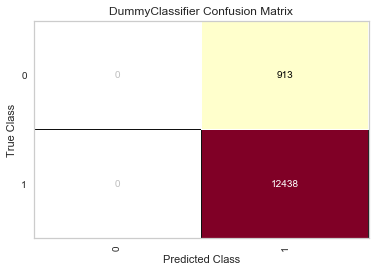

In [12]:
cm = ConfusionMatrix(dummy0);
cm.score(X_test_0, y_test_0);
cm.poof();

In [13]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 62185, 0: 62185})


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

In [15]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [16]:
# clf = LogisticRegression(penalty='l1', random_state=42, solver='saga', max_iter=1000).fit(X_train, y_train)
# clf.predict(X_test)
# clf.predict_proba(X_test)
# clf.score(X_test, y_test)

In [17]:
# X = sm.add_constant(X)
# logit_model = sm.Logit(y, X)
# result = logit_model.fit_regularized(method='l1')
# result.summary()

In [18]:
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
feats = {}
for feature, importance in zip(X_labels, clf_rf.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'importance'})
importances.sort_values(by='importance', inplace=True, ascending=False)
importances.head()

,importance
WALLCRACK,0.063272
RODENT,0.042264
LEAKI,0.033583
LEAKO,0.031328
KITEXCLU,0.029099


In [20]:
y_train_hat = clf_rf.predict(X_train)
print(classification_report(y_train, y_train_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49748
           1       1.00      1.00      1.00     49748

    accuracy                           1.00     99496
   macro avg       1.00      1.00      1.00     99496
weighted avg       1.00      1.00      1.00     99496



In [21]:
y_test_hat = clf_rf.predict(X_test)
clf_rf.score(X_test, y_test)

0.9915976521669213

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


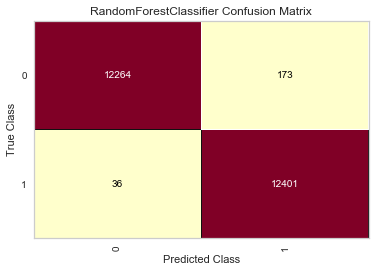

In [22]:
cm = ConfusionMatrix(clf_rf);
cm.score(X_test, y_test);
cm.poof();

In [24]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12437
           1       0.99      1.00      0.99     12437

    accuracy                           0.99     24874
   macro avg       0.99      0.99      0.99     24874
weighted avg       0.99      0.99      0.99     24874

